<a href="https://colab.research.google.com/github/annasajkh/clip-experiment/blob/main/clip_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Apr 21 22:34:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install git+https://github.com/openai/CLIP.git


import torch
import clip
from torch.optim import AdamW
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm
import torch.nn.functional as F
import torch.nn as nn


normalize_clip = transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))

augmentation = nn.Sequential(
  transforms.RandomHorizontalFlip(0.5),
  transforms.RandomAffine(degrees=30, translate=(0.0, 0.3)),
  transforms.RandomCrop(size=(224, 224))
)

device = "cuda" if torch.cuda.is_available() else "cpu"

clip_model, _ = clip.load("ViT-B/32", device=device)

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-bluhxd21
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-bluhxd21
     |████████████████████████████████| 53 kB 1.1 MB/s 
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369328 sha256=71a35026b66910f2b28cb2a1fe344fbec380ea688186596ae92394a7cb891d59
  Stored in directory: /tmp/pip-ephem-wheel-cache-s6ypw06i/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 92.3MiB/s]


In [3]:
class Upscaler(nn.Module):
  def __init__(self):
    super().__init__()

    self.mapper = nn.Sequential(
        nn.Linear(512, 512 * 4),
        nn.GELU(),
        nn.Linear(512 * 4, 512),
        nn.GELU()
    )
    
    self.layers = nn.Sequential(
        nn.Upsample(scale_factor=3, mode="bilinear", align_corners=True),
        nn.ConvTranspose2d(512, 256, kernel_size=3, stride=1),
        nn.GELU(),
        
        nn.Upsample(scale_factor=3, mode="bilinear", align_corners=True),
        nn.ConvTranspose2d(256, 128, kernel_size=3, stride=1),
        nn.GELU(),
        
        nn.Upsample(scale_factor=3, mode="bilinear", align_corners=True),
        nn.ConvTranspose2d(128, 64, kernel_size=3, stride=1),
        nn.GELU(),
        
        nn.Upsample(scale_factor=3, mode="bilinear", align_corners=True),
        nn.ConvTranspose2d(64, 3, kernel_size=3, stride=1),
        nn.Tanh()
        )
    
  def forward(self, x):
    x = self.mapper(x)
    return self.layers(x.unsqueeze(-1).unsqueeze(-1))

In [4]:
text = "red apple"

lr_init = 3e-4

steps = 1000

weight_decay = 0.5
 
image_augmentation_count = 4

show_interval = 50

  0%|          | 0/1000 [00:00<?, ?it/s]


red apple
Loss: 4.5078125


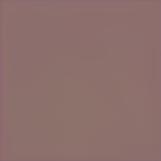

  5%|▍         | 49/1000 [00:03<01:05, 14.54it/s]


red apple
Loss: 3.125


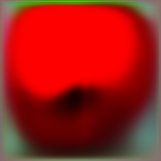

 10%|█         | 100/1000 [00:07<01:36,  9.28it/s]


red apple
Loss: 2.94140625


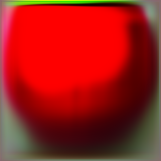

 15%|█▌        | 150/1000 [00:13<01:01, 13.79it/s]


red apple
Loss: 2.888671875


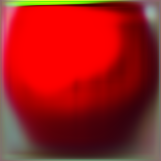

 20%|██        | 200/1000 [00:17<00:52, 15.29it/s]


red apple
Loss: 2.84375


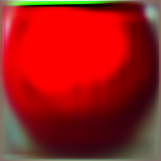

 25%|██▌       | 250/1000 [00:20<00:48, 15.43it/s]


red apple
Loss: 2.81640625


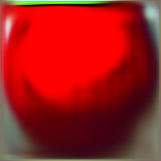

 30%|███       | 300/1000 [00:24<00:47, 14.59it/s]


red apple
Loss: 2.7890625


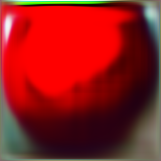

 35%|███▌      | 350/1000 [00:27<00:43, 14.92it/s]


red apple
Loss: 2.767578125


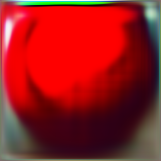

 40%|████      | 400/1000 [00:31<00:39, 15.26it/s]


red apple
Loss: 2.759765625


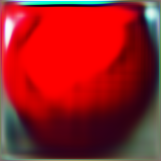

 45%|████▌     | 450/1000 [00:34<00:35, 15.59it/s]


red apple
Loss: 2.724609375


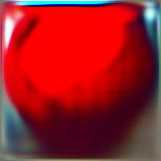

 50%|█████     | 500/1000 [00:37<00:35, 14.26it/s]


red apple
Loss: 2.720703125


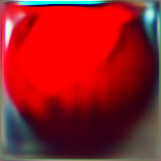

 55%|█████▌    | 550/1000 [00:41<00:30, 14.74it/s]


red apple
Loss: 2.7109375


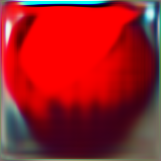

 60%|██████    | 600/1000 [00:44<00:26, 15.23it/s]


red apple
Loss: 2.673828125


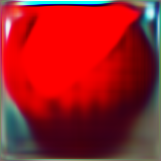

 65%|██████▌   | 650/1000 [00:48<00:25, 13.95it/s]


red apple
Loss: 2.671875


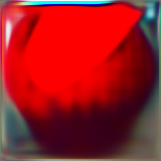

 70%|███████   | 700/1000 [00:51<00:19, 15.15it/s]


red apple
Loss: 2.64453125


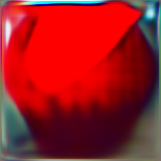

 75%|███████▌  | 750/1000 [00:55<00:16, 15.26it/s]


red apple
Loss: 2.646484375


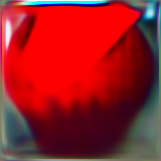

 80%|████████  | 800/1000 [00:58<00:13, 15.15it/s]


red apple
Loss: 2.650390625


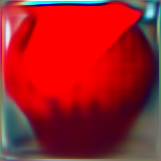

 85%|████████▌ | 850/1000 [01:02<00:11, 12.51it/s]


red apple
Loss: 2.6328125


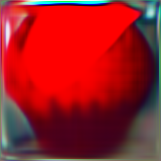

 90%|█████████ | 900/1000 [01:05<00:07, 12.63it/s]


red apple
Loss: 2.640625


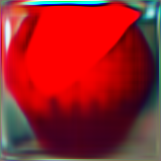

 95%|█████████▌| 950/1000 [01:09<00:03, 14.59it/s]


red apple
Loss: 2.626953125


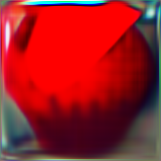

100%|██████████| 1000/1000 [01:13<00:00, 13.67it/s]

red apple
Loss: 2.640625


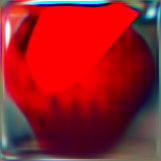

In [6]:
upscaler = Upscaler()
upscaler.to(device)

text_tokenized = clip.tokenize([text]).to(device)

rand_latent = torch.randn(1, 512).to(device)

optimizer = AdamW(upscaler.parameters(), lr=lr_init, weight_decay=weight_decay)

for i in tqdm(range(steps)):

    y = upscaler(rand_latent)
    y_norm = (y * 127.5 + 128).clamp(0, 255) / 255
    
    img = normalize_clip(y_norm)
    
    image = F.interpolate(img, (224, 224))

    images = torch.zeros(image_augmentation_count, 3, 224, 224).to(device)
    
    for j in range(image_augmentation_count - 1):
        images[j] = augmentation(image)
    
    images[-1] = image
    
    texts = torch.repeat_interleave(text_tokenized, image_augmentation_count, dim=0)
    
    loss = 1 / clip_model(images, texts)[0].mean() * 100
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % show_interval == 0:
        print("\n" + text)
        print("Loss: " + str(loss.item()))
        
        with torch.no_grad():
            generated = (y.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
            display(Image.fromarray(generated[0].cpu().numpy(), "RGB"))
    
    

print(text)
print("Loss: " + str(loss.item()))

with torch.no_grad():
    generated = (y.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    display(Image.fromarray(generated[0].cpu().numpy(), "RGB"))